Match found at position: (0, 0) with similarity 71069.98179341794


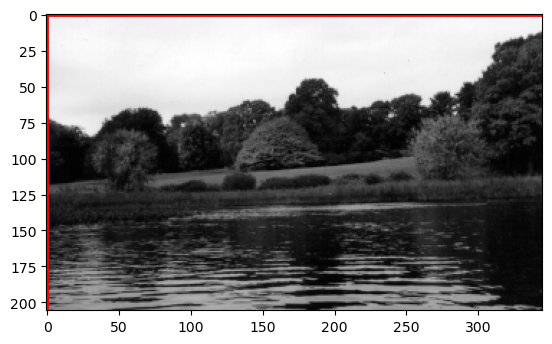

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# Fonction pour charger une image en tant que matrice (noir et blanc pour simplifier)
def load_image_as_matrix(path):
    image = plt.imread(path)
    # Convertir en niveaux de gris si c'est en couleur (3 canaux)
    if image.ndim == 3:
        image = np.mean(image, axis=2)
    return image

# Fonction pour normaliser les matrices pour éviter les biais
def normalize(matrix):
    return (matrix - np.mean(matrix)) / (np.std(matrix) + 1e-5)

# Fonction optimisée pour rechercher la petite image dans la grande image
def find_subimage_optimized(large_image, small_image):
    # Normalisation des deux images pour éviter les biais liés aux variations d'intensité
    large_image_norm = normalize(large_image)
    small_image_norm = normalize(small_image)
    
    # Utilisation de la convolution croisée 2D pour la correspondance
    correlation = correlate2d(large_image_norm, small_image_norm, mode='valid')
    
    # Trouver la position maximale dans la carte de corrélation
    max_corr = np.unravel_index(np.argmax(correlation), correlation.shape)
    max_value = np.max(correlation)
    
    # Seuil pour accepter une correspondance (à ajuster en fonction des besoins)
    threshold = 0.9
    
    if max_value >= threshold:
        print(f"Match found at position: {max_corr} with similarity {max_value}")
        return max_corr
    else:
        print("No strong match found.")
        return None

# Exemples pour charger et comparer les images
large_image = load_image_as_matrix('autumn.tif')
small_image = load_image_as_matrix('autumn.tif')

# Rechercher la petite image dans la grande image avec optimisation
position = find_subimage_optimized(large_image, small_image)

# Afficher la grande image et la position si trouvée
if position:
    aaa = plt.imshow(large_image, cmap='gray')
    plt.imsave('aaa.png',large_image)
    plt.gca().add_patch(plt.Rectangle((position[1], position[0]), small_image.shape[1], small_image.shape[0], edgecolor='red', facecolor='none', lw=2))
    plt.show()


TypeError: Image data of dtype object cannot be converted to float

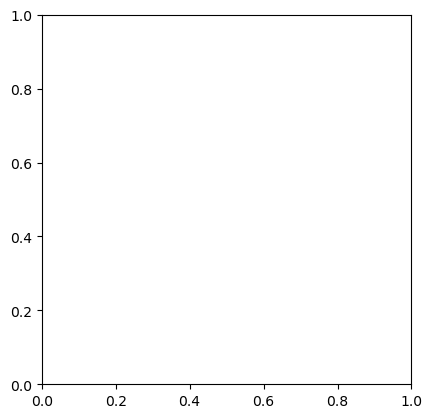

In [85]:
plt.imshow(aaa)

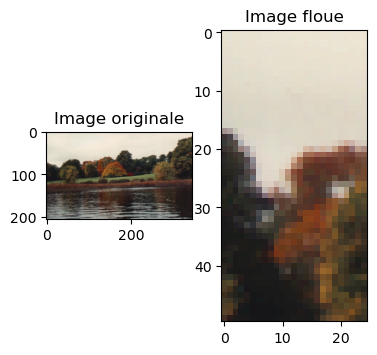

In [10]:
a = plt.imread('autumn.tif')
x = plt.imread('xx.png')
plt.subplot(1,3, 1)
plt.title("Image originale")
plt.imshow(a)
    
plt.subplot(1,3, 2)
plt.title("Image floue")
plt.imshow(x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# fonction pour charger une image en tant que matrice (noir et blanc pour simplifier)
def load_image_as_matrix(path):
    image = plt.imread(path)
    # Convertir en niveaux de gris si c'est en couleur (3 canaux)
    if image.ndim == 3:
        image = np.mean(image, axis=2)
    return image

# fnction pour normaliser les matrices
def normalize(matrix):
    return (matrix - np.mean(matrix)) / (np.std(matrix) + 1e-5)

# fonction pour comparer pixel par pixel si la corrélation initiale trouve une correspondance
def pixel_wise_comparison(large_image, small_image, position):
    i, j = position
    sub_matrix = large_image[i:i + small_image.shape[0], j:j + small_image.shape[1]]
    return np.array_equal(sub_matrix, small_image)

# fonction optimisée avec double vérification
def find_subimage_optimized(large_image, small_image, threshold=0.9):
    # Normaliser les images
    large_image_norm = normalize(large_image)
    small_image_norm = normalize(small_image)
    
    # corrélation croisée 2D
    correlation = correlate2d(large_image_norm, small_image_norm, mode='valid')
    
    # trouver toutes les positions où la similarité dépasse le seuil
    possible_positions = np.argwhere(correlation >= threshold)
    
    for position in possible_positions:
        # vérifier pixel par pixel après la détection de corrélation
        if pixel_wise_comparison(large_image, small_image, position):
            print(f"Exact match found at position: {position}")
            return position
    
    print("No exact match found.")
    return None

# exemples pour charger et comparer les images
large_image = load_image_as_matrix('autumn.tif')
small_image = load_image_as_matrix('xx.png')

# rechercher la petite image dans la grande image avec vérification supplémentaire
position = find_subimage_optimized(large_image, small_image, threshold=0.9)

# afficher la grande image et la position si trouvée
if position is not None:
    plt.imshow(large_image, cmap='gray')
    plt.gca().add_patch(plt.Rectangle((position[1], position[0]), small_image.shape[1], small_image.shape[0], edgecolor='red', facecolor='none', lw=2))
    plt.show()


No exact match found.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# fonction pour charger une image en tant que matrice (noir et blanc pour simplifier)
def load_image_as_matrix(path):
    image = plt.imread(path)
    # Convertir en niveaux de gris si c'est en couleur (3 canaux)
    if image.ndim == 3:
        image = np.mean(image, axis=2)
    return image

# fonction pour normaliser les matrices
def normalize(matrix):
    return (matrix - np.mean(matrix)) / (np.std(matrix) + 1e-5)

# fonction pour comparer pixel par pixel avec une tolérance
def pixel_wise_comparison_with_tolerance(large_image, small_image, position, tolerance=10):
    i, j = position
    sub_matrix = large_image[i:i + small_image.shape[0], j:j + small_image.shape[1]]
    
    # calculer l'erreur quadratique moyenne (MSE)
    mse = np.mean((sub_matrix - small_image) ** 2)
    
    # si l'erreur est inférieure à la tolérance, on considère qu'il y a correspondance
    return mse < tolerance

# fonction optimisée avec tolérance pour la correspondance
def find_subimage_optimized(large_image, small_image, threshold=0.8, tolerance=10):
    # normaliser les images
    large_image_norm = normalize(large_image)
    small_image_norm = normalize(small_image)
    
    # corrélation croisée 2D
    correlation = correlate2d(large_image_norm, small_image_norm, mode='valid')
    
    # trouver toutes les positions où la similarité dépasse le seuil
    possible_positions = np.argwhere(correlation >= threshold)
    
    for position in possible_positions:
        # verifier avec tolerance apres la detection de corrélation
        if pixel_wise_comparison_with_tolerance(large_image, small_image, position, tolerance):
            print(f"Match found at position: {position} with tolerance {tolerance}")
            return position
    
    print("No exact match found.")
    return None

# exemples pour charger et comparer les images
large_image = load_image_as_matrix('autumn.tif')
small_image = load_image_as_matrix('xx.png')

# rechercher la petite image dans la grande image avec tolérance
position = find_subimage_optimized(large_image, small_image, threshold=0.8, tolerance=10)

# afficher la grande image et la position si trouvée
if position is not None:
    plt.imshow(large_image, cmap='gray')
    plt.gca().add_patch(plt.Rectangle((position[1], position[0]), small_image.shape[1], small_image.shape[0], edgecolor='red', facecolor='none', lw=2))
    plt.show()


No exact match found.


Match found at position: (41, 212) with similarity 1309.069339187843


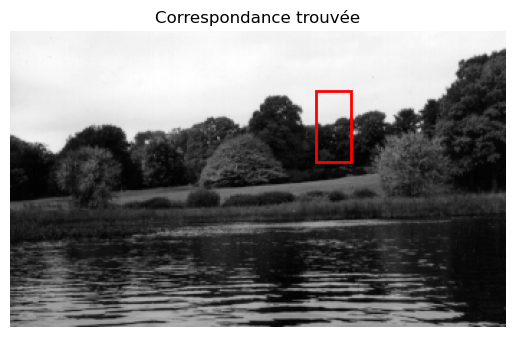

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour charger une image en tant que matrice (en niveaux de gris)
def load_image_as_matrix(path):
    image = plt.imread(path)
    if image.ndim == 3:  # Si l'image est en couleur
        image = np.mean(image, axis=2)  # Convertir en niveaux de gris
        
    return image

# Fonction pour normaliser une matrice
def normalize(matrix):
    return (matrix - np.mean(matrix)) / (np.std(matrix) + 1e-5)

# Fonction pour rechercher la petite image dans la grande image
def find_subimage_optimized(large_image, small_image, threshold=0.9):
    # Normalisation des images
    large_image_norm = normalize(large_image)
    small_image_norm = normalize(small_image)

    # Dimensions des images
    large_h, large_w = large_image.shape
    small_h, small_w = small_image.shape
    
    # Créer une carte de corrélation
    correlation_map = np.zeros((large_h - small_h + 1, large_w - small_w + 1))
    
    # Calcul de la carte de corrélation
    for i in range(correlation_map.shape[0]):
        for j in range(correlation_map.shape[1]):
            sub_matrix = large_image_norm[i:i + small_h, j:j + small_w]
            # Produit scalaire pour calculer la similarité
            correlation_map[i, j] = np.sum(sub_matrix * small_image_norm)

    # Trouver la position maximale dans la carte de corrélation
    max_corr = np.unravel_index(np.argmax(correlation_map), correlation_map.shape)
    max_value = np.max(correlation_map)

    if max_value >= threshold:
        print(f"Match found at position: {max_corr} with similarity {max_value}")
        return max_corr
    else:
        print("No strong match found.")
        return None

# Charger les images
large_image = load_image_as_matrix('autumn.tif')
small_image = load_image_as_matrix('xx.png')  # Remplace par un autre chemin pour la petite image

# Rechercher la petite image dans la grande image
position = find_subimage_optimized(large_image, small_image)

# Afficher la grande image et la position si trouvée
if position:
    a = plt.imshow(large_image, cmap='gray')
    plt.gca().add_patch(plt.Rectangle((position[1], position[0]), small_image.shape[1], small_image.shape[0], edgecolor='red', facecolor='none', lw=2))
    plt.title('Correspondance trouvée')
    plt.axis('off')
    plt.show()


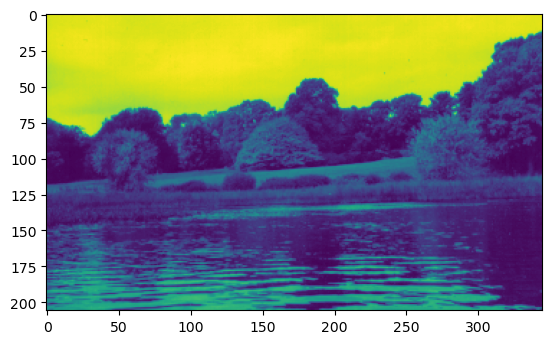

In [ ]:
def load_image_as_matrix(path):
    image = plt.imread(path)
    # Convertir en niveaux de gris si c'est en couleur (3 canaux)
    if image.ndim == 3:
        image = np.mean(image, axis=2)
    return image

b = load_image_as_matrix('autumn.tif')
plt.imshow(b)
plt.imsave('aaa.png',b)

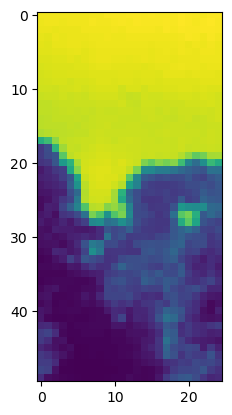

In [ ]:
b1 = b[50:100,75:100]
plt.imsave('b1.png',b1)
plt.imshow(b1)
plt.savefig("pixeled_one")


Match found at position: (50, 50) with similarity 4666.5732421875


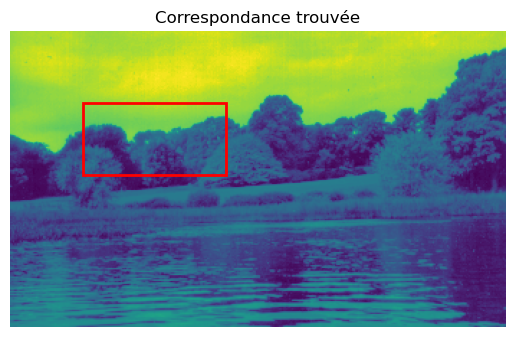

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour charger une image en tant que matrice (en niveaux de gris)
def load_image_as_matrix(path):
    image = plt.imread(path)
    if image.ndim == 3:  # Si l'image est en couleur
        image = np.mean(image, axis=2)  # Convertir en niveaux de gris
        
    return image

# Fonction pour normaliser une matrice
def normalize(matrix):
    return (matrix - np.mean(matrix)) / (np.std(matrix) + 1e-5)

# Fonction pour rechercher la petite image dans la grande image
def find_subimage_optimized(large_image, small_image, threshold=0.9):
    # Normalisation des images
    large_image_norm = normalize(large_image)
    small_image_norm = normalize(small_image)

    # Dimensions des images
    large_h, large_w = large_image.shape
    small_h, small_w = small_image.shape
    
    # Créer une carte de corrélation
    correlation_map = np.zeros((large_h - small_h + 1, large_w - small_w + 1))
    
    # Calcul de la carte de corrélation
    for i in range(correlation_map.shape[0]):
        for j in range(correlation_map.shape[1]):
            sub_matrix = large_image_norm[i:i + small_h, j:j + small_w]
            # Produit scalaire pour calculer la similarité
            correlation_map[i, j] = np.sum(sub_matrix * small_image_norm)

    # Trouver la position maximale dans la carte de corrélation
    max_corr = np.unravel_index(np.argmax(correlation_map), correlation_map.shape)
    max_value = np.max(correlation_map)

    if max_value >= threshold:
        print(f"Match found at position: {max_corr} with similarity {max_value}")
        return max_corr
    else:
        print("No strong match found.")
        return None

# Charger les images
large_image = load_image_as_matrix('aaa.png')
small_image = load_image_as_matrix('x3.png')  # Remplace par un autre chemin pour la petite image

# Rechercher la petite image dans la grande image
position = find_subimage_optimized(large_image, small_image)

# Afficher la grande image et la position si trouvée
if position:
    a = plt.imshow(large_image)
    plt.gca().add_patch(plt.Rectangle((position[1], position[0]), small_image.shape[1], small_image.shape[0], edgecolor='red', facecolor='none', lw=2))
    plt.title('Correspondance trouvée')
    plt.axis('off')
    plt.show()


In [107]:
plt.hist(b[:,:,0].ravel(), bins = 350)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

(array([ 2.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  7.,  0.,  0.,  0., 21.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 35.,  0.,  0., 48.,  0.,
         0.,  0.,  0., 29.,  0.,  0., 26.,  0.,  0., 25.,  0.,  0., 31.,
         0.,  0.,  0.,  0., 27.,  0.,  0., 22.,  0.,  0.,  0., 24.,  0.,
         0., 21.,  0., 30.,  0.,  0.,  0.,  0.,  0., 11.,  0., 13.,  0.,
         0., 15.,  0., 11.,  0.,  0.,  0., 13.,  0., 19.,  0.,  0.,  0.,
         0., 23.,  0., 12.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  2.,  5.,
         0.,  0.,  3.,  0.,  0.,  0.,  9.,  3.,  0.,  1.,  0.,  0.,  3.,
         0.,  2.,  0.,  0.,  1.,  0.,  0.,  8.,  0.,  0.,  0.,  2.,  2.,
         0.,  4.,  0.,  0.,  3.,  0.,  5.,  3.,  0.,  0.,  0.,  3.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  3.,  4.,  0.,  2.,  3.,  0.,  2.,
         0.,  0.,  1.,  0.,  3.,  0.,  1.,  0.,  0.,  1.,  3.,  0.,  0.,
         0.,  2.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  2.,  0.,  1.,
         0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.

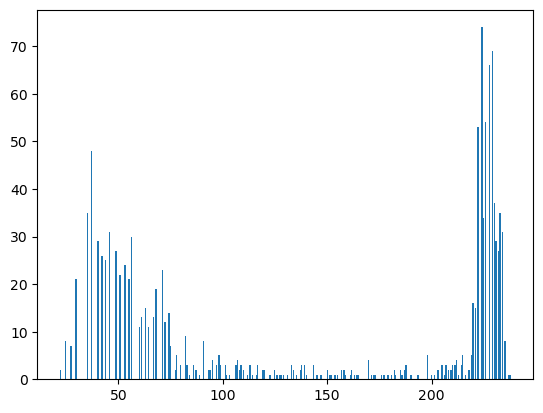

In [54]:
plt.hist(a[50:75,200:250,0].ravel(), bins = 350)


(array([ 1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,  3.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  1.,
         0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  1.,  3.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  2.,  1.,  0.,  0.,
         0.,  1.,  0.,  3.,  2.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,
         0.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.

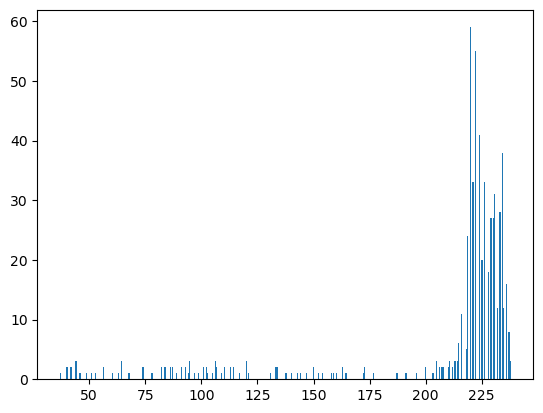

In [57]:
plt.hist(a[50:75,75:100,0].ravel(), bins = 350)
